<a href="https://colab.research.google.com/github/jessie4242/ProyectoAprendizajeAutomatico_InsuficienciaCardiaca/blob/master/entrenamientoIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="color: #ea2c62"><center>Predicción de supervivencia ante insuficiencia cardíaca</center></h1>


<h2 style="color: #ea2c62"><center> Entrenamiento de Datos para definir la Supervivencia de un Paciente con IC</center></h2>
<p> <center>En el presente modelo de predicción tomamos en cuenta 5 modelos de Machine Learning: Regresión Logísitica, KNN, Árboles de Desición, Soporte de Máquina vectorial y Random Forest.Estos para poder evaluar de su algoritmo de aprendizaje automático es una parte esencial del proyecto.El modelo puede brindarle resultados satisfactorios cuando se evalúa utilizando una métrica,el cuál evaluamos con <b> precision_score, </b> pero puede dar resultados deficientes cuando se evalúa con otras métricas,y así poder evaluar datos ingresados en el formulario y poder predecir su evento de Supervivencia. </center></p>

<p> <center>La evaluación del modelo de aprendizaje automático se basa en algunas métricas predeterminadas.
Cuando se trata de construir modelos de clasificación, lo más probable es que utilices una matriz de confusión y métricas relacionadas esto mediante una matriz de confusión, también conocida como matriz de error, es una tabla resumida que se utiliza para evaluar el rendimiento de un modelo de clasificación. El número de predicciones correctas e incorrectas se resumen con los valores de conteo y se desglosan por cada clase.</center></p>
<center><img src=https://miro.medium.com/max/1129/1*n2im9rDJdRQMBNZ3pPMKXw.png style="width: 500px;"></center>

<p>Donde evaluaremos el mejor modelo verificando el porcentaje de "LOS FALSOS POSITIVOS", ya que si este es amplio, no es un modelo recomendable , indicar al paciente que va a sobrevivir cuando NO</p>

<h2 style="color: #28abb9"><center>Librerias Utilizadas para realizar predicción del evento de muerte de Insuficiencia cardiaca</center></h2>

In [ ]:
#Librerias de Análisis de Datos
import pandas as pd                                                #Incluye también funciones de representación gráfica
import numpy as np                                                 #Proporciona algunas funcionalidades matemáticas avanzadas
import matplotlib.pyplot as plt                                    #Biblioteca de trazado numérico

#Librerias para análisis de datos predictivos
from sklearn.model_selection import train_test_split               #Incluye varios algoritmos de clasificación, regresión y 
from sklearn.linear_model import LogisticRegression                #análisis de grupos entre los cuales están máquinas de 
from sklearn.neighbors import KNeighborsClassifier                 #vectores de soporte, bosques aleatorios,K-means 
from sklearn.tree import DecisionTreeClassifier                    #Está diseñada para interoperar con las bibliotecas 
from sklearn.svm import SVC                                        #numéricas y científicas NumPy y SciPy.
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

#Bibliotecas para visualización de Datos
from mlxtend.plotting import plot_confusion_matrix                #Diagrama de dispersión para trazar categorías en diferentes

import plotly.graph_objects as go                                 #Realiza gráficos interactivos

#Libreria para almacenamiento de Resultados
import pickle                                                     #Representan un objeto Python como una cadena de bytes. Se                                                                            pueden hacer multitud de cosas con dichos bytes, como por                                                                            ejemplo, almacenarlos en un archivo o base de datos, o                                                                               transferirlos a través de una red.

<h2 style="color: #ea2c62"><center>Importación del dataset</center></h2>
AL haber realizado ya la exploración de datos en el dataset estos son exportados para el entrenamiento de predicción de datos y aplicarlos con los datos de prueba.

In [ ]:
dataset = pd.read_csv('heart_failure_clinical_records_dataset.csv')

<h2 style="color: #28abb9"><center>División aleatoria del Dataset al 80%</center></h2>
Aquí tomaremos el conjunto del dataset dividido al 80% de los datos donde el 20% serán los datos de prueba, es decir,son aquellos datos que no vio el algoritmo de predicción.

In [ ]:
Datos = ['age','sex','creatinine_phosphokinase','ejection_fraction','high_blood_pressure','platelets','serum_creatinine','time']
x = dataset[Datos]
y = dataset['DEATH_EVENT']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=2)     #Evaluación al 80% de los datos
resultados=[] 

<h2 style="color: #28abb9"><center>Modelo de Regresión Logística</center></h2>
Con un análisis de regresión es posible poder predecir el resultado de una variable categórica en función de variables independientes.

In [ ]:
reg_log = LogisticRegression()                         #Instancia de la Regresión Logística
reg_log.fit(x_train,y_train)                           #Entrena la regresión logística con los datos de entrenamiento
reg_log_pred = reg_log.predict(x_test)                 #Usa el modelo entrenado para obtener las predicciones con datos nuevos
reg_log_score = accuracy_score(y_test, reg_log_pred)   #Evaluación de metrica
resultados.append(100*reg_log_score)

<Figure size 432x288 with 0 Axes>

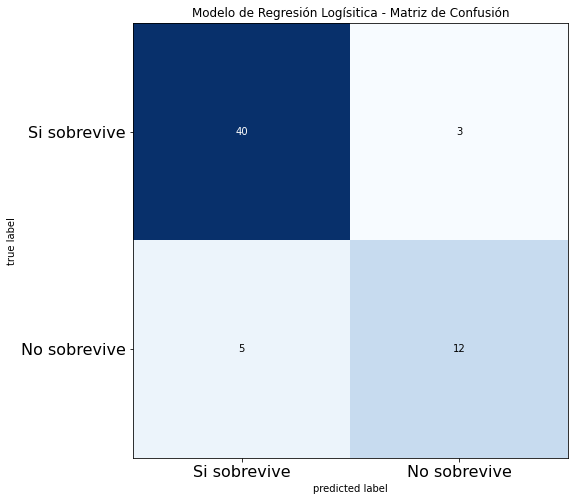

In [ ]:
cm = confusion_matrix(y_test, reg_log_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Modelo de Regresión Logísitica - Matriz de Confusión")
plt.xticks(range(2), ["Si sobrevive","No sobrevive"], fontsize=16)
plt.yticks(range(2), ["Si sobrevive","No sobrevive"], fontsize=16)
plt.show() 

<h2 style="color: #28abb9"><center>Modelo de K-means</center></h2>
Es un método de agrupamiento, que tiene como objetivo la partición de un conjunto de n observaciones en k grupos en el que cada observación pertenece al grupo cuyo valor medio es más cercano.

In [ ]:
clas_KNN = KNeighborsClassifier()
clas_KNN.fit(x_train, y_train)
knn_pred = clas_KNN.predict(x_test)
knn_score = accuracy_score(y_test, knn_pred)
resultados.append(100*knn_score)

<Figure size 432x288 with 0 Axes>

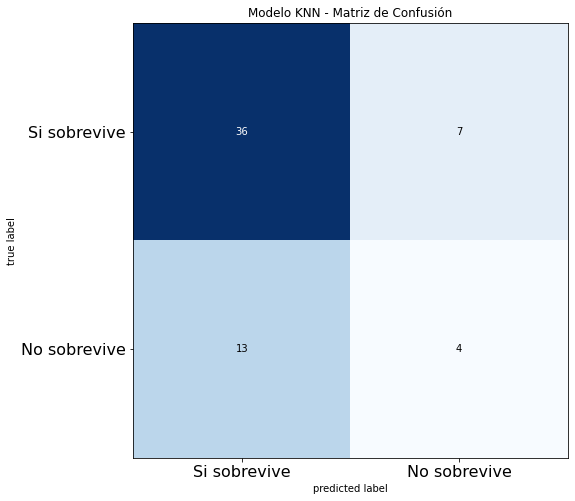

In [ ]:
cm = confusion_matrix(y_test, knn_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Modelo KNN - Matriz de Confusión")
plt.xticks(range(2), ["Si sobrevive","No sobrevive"], fontsize=16)
plt.yticks(range(2), ["Si sobrevive","No sobrevive"], fontsize=16)
plt.show() 

<h2 style="color: #28abb9"><center>Modelo de Árboles de Decisión</center></h2>
Un árbol de decisión es una estructura de árbol similar a un diagrama de flujo que utiliza un método de bifurcación para ilustrar cada resultado posible de una decisión. 

In [ ]:
arbol_des = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0, criterion='entropy')
arbol_des.fit(x_train, y_train)
arbol_pred = arbol_des.predict(x_test)
arbol_score = accuracy_score(y_test, arbol_pred)
resultados.append(100*arbol_score)

<Figure size 432x288 with 0 Axes>

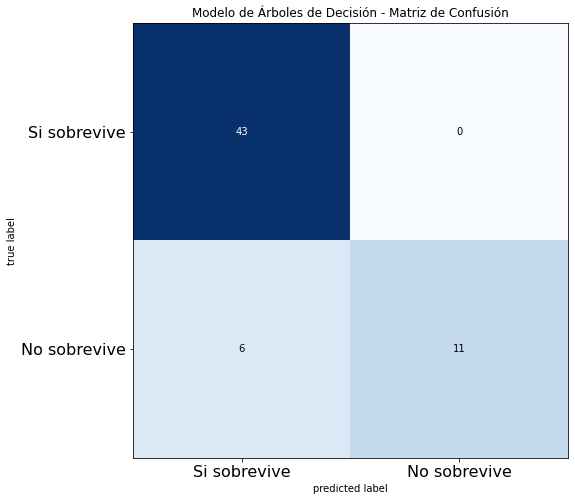

In [ ]:
cm = confusion_matrix(y_test, arbol_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Modelo de Árboles de Decisión - Matriz de Confusión")
plt.xticks(range(2), ["Si sobrevive","No sobrevive"], fontsize=16)
plt.yticks(range(2), ["Si sobrevive","No sobrevive"], fontsize=16)
plt.show() 

<h2 style="color: #28abb9"><center>Soporte de Maquina Vectorial SVM</center></h2>
Traza cada observación como un punto en un espacio dimensional n - donde n es el número de características que tenemos.

In [ ]:
svm_des = SVC()
svm_des.fit(x_train, y_train)
svm_pred = svm_des.predict(x_test)
svm_score = accuracy_score(y_test, svm_pred)
resultados.append(100* svm_score)

<Figure size 432x288 with 0 Axes>

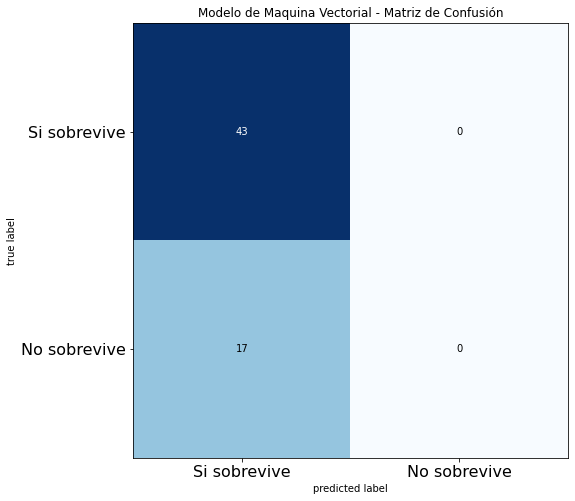

In [ ]:
cm = confusion_matrix(y_test, svm_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Modelo de Maquina Vectorial - Matriz de Confusión")
plt.xticks(range(2), ["Si sobrevive","No sobrevive"], fontsize=16)
plt.yticks(range(2), ["Si sobrevive","No sobrevive"], fontsize=16)
plt.show() 

<center><h2 style="color: #28abb9">Random Forest</center></h2></center>

In [ ]:
randForest = RandomForestClassifier(max_features=0.5, max_depth=15, random_state=1)
randForest.fit(x_train, y_train)
randForest_pred = randForest.predict(x_test)
randForest_score = accuracy_score(y_test, randForest_pred)
resultados.append(100*randForest_score)

<Figure size 432x288 with 0 Axes>

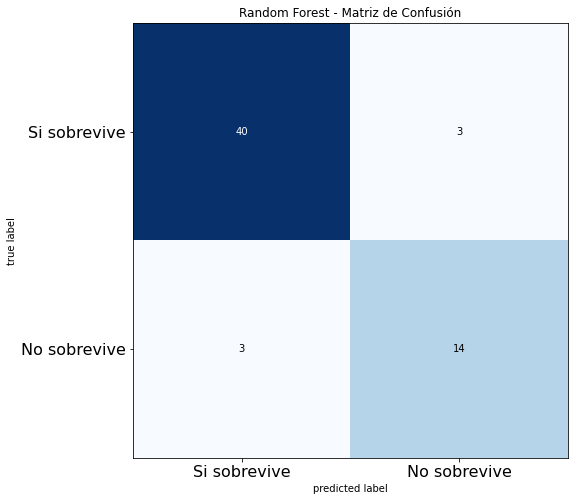

In [ ]:
cm = confusion_matrix(y_test, randForest_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Random Forest - Matriz de Confusión")
plt.xticks(range(2), ["Si sobrevive","No sobrevive"], fontsize=16)
plt.yticks(range(2), ["Si sobrevive","No sobrevive"], fontsize=16)
plt.show() 

<center><h2 style="color: #28abb9">Evaluación de exactitud de los modelos</center></h2></center>

In [ ]:
modelos= ['Regresión Lineal', 'KNN','Arboles de Decisión', 'SVM', 'RandomForest']

fig = go.Figure([go.Bar(x=modelos, y=[reg_log_score,knn_score,arbol_score,svm_score,randForest_score],)])
fig.update_layout(title_text="Porcentaje de Exactitud de cada modelo")
fig.show()

<center><h2 style="color: #28abb9">Conclusión de Evaluación de Modelos</center></h2></center>
Como podemos observar los modelos con alta probabilidad son "Árboles de Desición y Random Forest" ambos con un 90%, por el cuál determinamos mediante su porcentaje de "Falsos Positivos" y el que tiene mejor exactitud es "Arboles de Desición" con 0 datos, a diferencia de "RandomForest" con 3 datos.


<center><h2 style="color: #28abb9">Datos de Prueba ante algoritmos de Aprendizaje</center></h2></center>

<h2 style="color: #f0f0f0"><center>Prueba de Modelo y evaluación de Datos con Regresión Logistica </center></h2>

In [ ]:
idx = np.where((x_test['age']==94) & (x_test['creatinine_phosphokinase']==582) & (x_test['ejection_fraction']==38))
evento = reg_log_pred[idx]
print(evento)

[1]


<h2 style="color: #f0f0f0"><center>Prueba de Modelo y evaluación de Datos con K-means </center></h2>

In [ ]:
idx = np.where((x_test['age']==94) & (x_test['creatinine_phosphokinase']==582) & (x_test['ejection_fraction']==38))
evento = knn_pred[idx]
print(evento)

[1]


<h2 style="color: #f0f0f0"><center>Prueba de Modelo y evaluación de Datos con Árboles de Predicción </center></h2>

In [ ]:
idx = np.where((x_test['age']==94) & (x_test['creatinine_phosphokinase']==582) & (x_test['ejection_fraction']==38))
evento = arbol_pred[idx]
print(evento)

[1]


<h2 style="color: #f0f0f0"><center>Prueba de Modelo y evaluación de Datos con Soporte de Máquina Vetorial </center></h2>

In [ ]:
idx = np.where((x_test['age']==94) & (x_test['creatinine_phosphokinase']==582) & (x_test['ejection_fraction']==38))
evento = svm_pred[idx]
print(evento)

[0]


<h2 style="color: #f0f0f0"><center>Prueba de Modelo y evaluación de Datos con Random Forest </center></h2>

In [ ]:
idx = np.where((x_test['age']==94) & (x_test['creatinine_phosphokinase']==582) & (x_test['ejection_fraction']==38))
evento = randForest_pred[idx]
print(evento)

[1]


<h2 style="color: #28abb9"><center>Almacenamiento de Modelo para importarlo al Formulario </center></h2>

In [ ]:
# Guardar el modelo en un archivo .sav
filename = 'modeloIC.sav'
pickle.dump(arbol_des, open(filename, 'wb'))                    #Guardamos el modelo de árboles de Dicisión en el archivo                                                                      para evaluarlo ante la interfaz gráfica.